In [44]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, auc
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
# load the dataset
churn_df = pd.read_csv('data/churn.csv')
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# check the info of the dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# check the summary statistics
churn_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
# check for missing values
churn_df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
# check for duplicate values
churn_df.duplicated().sum()

np.int64(0)

In [7]:
# display the unique values in the target column
churn_df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

We may have to deal with the class imbalance for a more robust model performance.

In [56]:
# data preprocessing

# convert 'yes'/'no' to 1/0 by binary mapping
churn_df['international plan'] = churn_df['international plan'].map({'yes': 1, 'no': 0})
churn_df['voice mail plan'] = churn_df['voice mail plan'].map({'yes': 1, 'no': 0})
churn_df['churn'] = churn_df['churn'].astype(int)

# Encode 'state' and 'phone number' as numerical labels
le = LabelEncoder()
churn_df['state'] = le.fit_transform(churn_df['state'])
churn_df['phone number'] = le.fit_transform(churn_df['phone number'])

# save the cleaned & preprocessed dataset
churn_df.to_csv('data/churn_cleaned.csv', index=False)

# display the first 5 rows
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,NaN,NaN,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,1575,NaN,NaN,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1117,NaN,NaN,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1707,NaN,NaN,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,110,NaN,NaN,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Now that our data is preprocessed, we can proceed to split into train and test sets.

In [27]:
# define X and y variables
X = churn_df.drop(columns='churn', axis=1)
y = churn_df['churn']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# scale the train and test features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# display the shape of thr train and test sets
print("Shape of scaled X_train:", X_train_scaled.shape)
print("Shape of scaled X_test:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of scaled X_train: (2999, 20)
Shape of scaled X_test: (334, 20)
Shape of y_train: (2999,)
Shape of y_test: (334,)


In [29]:
# instantiate a Logistic regression model
log_model = LogisticRegression()

# fit the training data
log_model.fit(X_train_scaled, y_train)

# make predictions on test set
y_pred_log = log_model.predict(X_test_scaled)

# compute the accuracy of the model
log_acc = accuracy_score(y_test, y_pred_log)
print("Logistic Regression model accuracy:", log_acc)

Logistic Regression model accuracy: 0.844311377245509


In [30]:
# display the classification report
report = classification_report(y_true=y_test, y_pred=y_pred_log)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       286
           1       0.41      0.19      0.26        48

    accuracy                           0.84       334
   macro avg       0.64      0.57      0.59       334
weighted avg       0.81      0.84      0.82       334



In [16]:
# compute the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_log)
conf_matrix

array([[282,   4],
       [ 46,   2]])

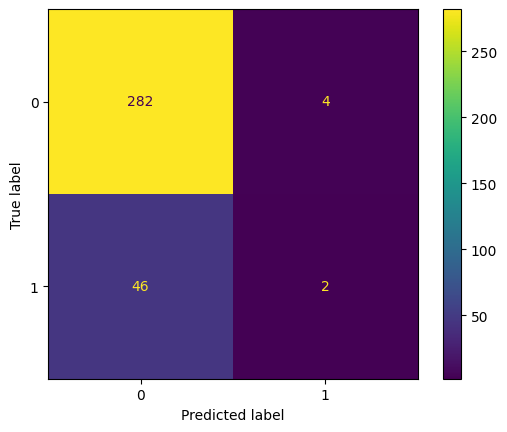

In [17]:
# plot the confusion matrix
conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_model.classes_)
conf_disp.plot()

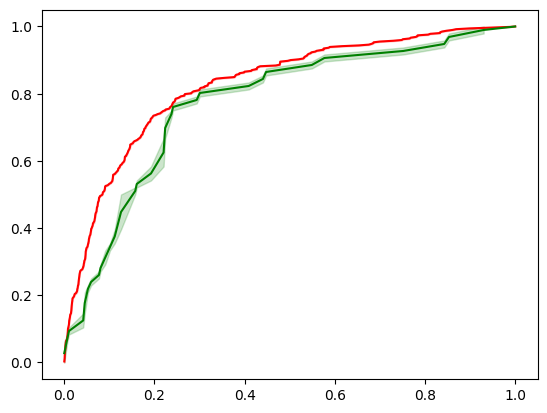

In [31]:
# define the train false positive and true positive rates
fpr_train, tpr_train, thres = roc_curve(y_true=y_train, y_score=log_model.decision_function(X_train_scaled))

# define the test false positive and true positive rates
fpr_test, tpr_test, _ = roc_curve(y_true=y_test, y_score=log_model.decision_function(X_test_scaled))

# plot the ROC curve
sns.lineplot(x=fpr_train, y=tpr_train, color="red")
sns.lineplot(x=fpr_test, y=tpr_test, color="green")
plt.show();

In [32]:
# compute the area under the curve
auc_score = auc(fpr_test, tpr_test)
auc_score

np.float64(0.7755681818181819)

In [ ]:
# # hyperparameter tuning for model optimization using GridSearchCV

# define the scope of the hyperparameters
# param_grid_log = [
#     # liblinear supports l1 and l2
#     {
#         'penalty': ['l1', 'l2'],
#         'C': np.logspace(-4, 4, 10),
#         'solver': ['liblinear'],
#         'max_iter': [1000]
#     },
#     # lbfgs, newton-cg, sag support only l2 or none
#     {
#         'penalty': ['l2', 'none'],
#         'C': np.logspace(-4, 4, 10),
#         'solver': ['lbfgs', 'newton-cg', 'sag'],
#         'max_iter': [1000]
#     },
#     # saga supports all penalties
#     {
#         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#         'C': np.logspace(-4, 4, 10),
#         'solver': ['saga'],
#         'l1_ratio': [0, 0.5, 1],  # Only used with elasticnet
#         'max_iter': [1000]
#     }
# ]

# # implement the GridSearchCV function
# grid_model_log = GridSearchCV(log_model, param_grid=param_grid_log, cv=10, verbose=True, n_jobs=-1, error_score='raise')

# # fit the training data and determine best model parameters
# grid_model_log.fit(X_train_scaled, y_train)
# print("Optimal model hyperparameters:", grid_model_log.best_params_)
# print("Best model estimators:", grid_model_log.best_estimator_)

In [42]:
# deal with imbalanced classes

# check the unique values in y_train
y_train.value_counts()

churn
0    2564
1     435
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

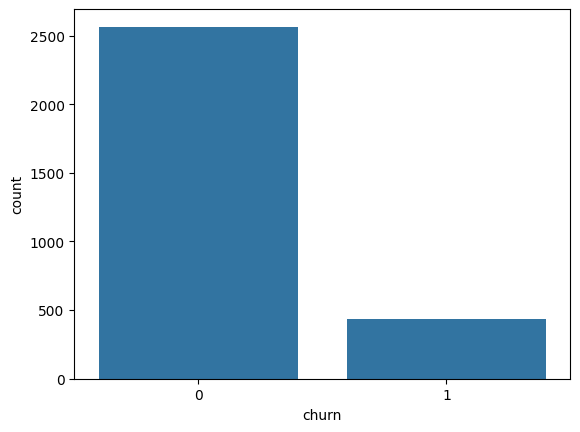

In [43]:
# plot the unique values
sns.countplot(x=y_train)

In [45]:
# implement SMOTE for handling class imbalance
smote = SMOTE(random_state=42)

# create SMOTE X and y variables for the train set
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# check the unique values in y_train_smote
y_train_smote.value_counts()

churn
0    2564
1    2564
Name: count, dtype: int64

In [47]:
# fit the Logistic Regression model with the SMOTE train dataset
log_model.fit(X_train_smote, y_train_smote)

# model prediction on test dataset
y_pred_smote_log = log_model.predict(X_test_scaled)

# display the classification report
report_smote = classification_report(y_true=y_test, y_pred=y_pred_smote_log)
print(report_smote)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       286
           1       0.33      0.67      0.44        48

    accuracy                           0.75       334
   macro avg       0.63      0.72      0.64       334
weighted avg       0.85      0.75      0.78       334



In [48]:
print(accuracy_score(y_test, y_pred_smote_log))

0.7544910179640718


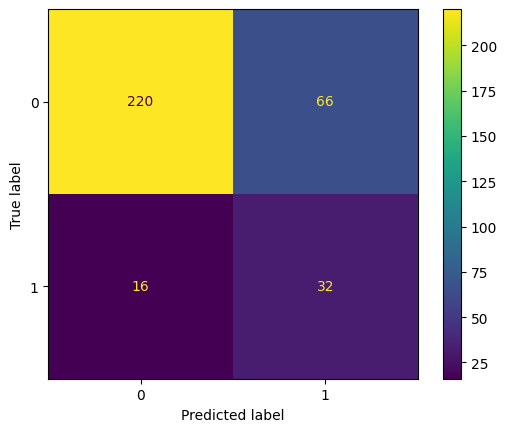

In [49]:
# compute the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_smote_log)
conf_matrix

# plot the confusion matrix
conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_model.classes_)
conf_disp.plot()

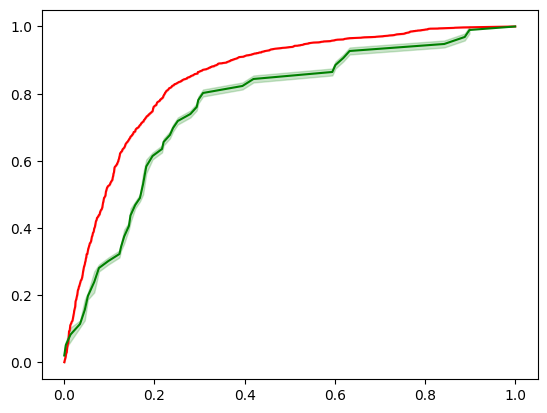

In [51]:
# define the train false positive and true positive rates
fpr_train_smote, tpr_train_smote, thres = roc_curve(y_true=y_train_smote, y_score=log_model.decision_function(X_train_smote))

# define the test false positive and true positive rates
fpr_test, tpr_test, _ = roc_curve(y_true=y_test, y_score=log_model.decision_function(X_test_scaled))

# plot the ROC curve
sns.lineplot(x=fpr_train_smote, y=tpr_train_smote, color="red")
sns.lineplot(x=fpr_test, y=tpr_test, color="green")
plt.show();